## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mouse_count = combined_mouse_data["Mouse ID"].nunique()
mouse_count

249

In [6]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints.
combined_mouse_data[combined_mouse_data[["Mouse ID","Timepoint"]].duplicated() == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Display all the data for the duplicate mouse ID
duplicate_mouse = combined_mouse_data.loc[combined_mouse_data["Mouse ID"]=="g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
clean_combined_mouse_data = combined_mouse_data.drop(combined_mouse_data.index[908:921])
clean_combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_combined_mouse_data["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_group = clean_combined_mouse_data.groupby("Drug Regimen")
drug_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()
drug_median = drug_regimen_group["Tumor Volume (mm3)"].median()
drug_variance = drug_regimen_group["Tumor Volume (mm3)"].var()
drug_std = drug_regimen_group["Tumor Volume (mm3)"].std()
drug_sem = drug_regimen_group["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({"Mean": drug_mean,"Median":drug_median,"Variance":drug_variance,\
                                   "Standard Deviation":drug_std,"SEM":drug_sem})
summary_statistics["Mean"] = summary_statistics["Mean"].map("{:,.2f}".format)
summary_statistics["Median"] = summary_statistics["Median"].map("{:,.2f}".format)
summary_statistics["Variance"] = summary_statistics["Variance"].map("{:,.2f}".format)
summary_statistics["Standard Deviation"] = summary_statistics["Standard Deviation"].map("{:,.2f}".format)
summary_statistics["SEM"] = summary_statistics["SEM"].map("{:,.2f}".format)
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# can this be solved with a for loop???
capomulin = clean_combined_mouse_data.loc[clean_combined_mouse_data["Drug Regimen"]=="Capomulin"]
capomulin_mean = round(capomulin["Tumor Volume (mm3)"].mean(),2)
capomulin_median = round(capomulin["Tumor Volume (mm3)"].median(),2)
capomulin_variance = round(capomulin["Tumor Volume (mm3)"].var(),2)
capomulin_std = round(capomulin["Tumor Volume (mm3)"].std(),2)
capomulin_sem = round(capomulin["Tumor Volume (mm3)"].sem(),2)
print(f"Capomulin has a mean of {capomulin_mean}, median of {capomulin_median}, variance of {capomulin_variance}, standard deviation of {capomulin_std}, and a SEM of {capomulin_sem}")

ceftamin = clean_combined_mouse_data.loc[clean_combined_mouse_data["Drug Regimen"]=="Ceftamin"]
ceftamin_mean = round(ceftamin["Tumor Volume (mm3)"].mean(),2)
ceftamin_median = round(ceftamin["Tumor Volume (mm3)"].median(),2)
ceftamin_variance = round(ceftamin["Tumor Volume (mm3)"].var(),2)
ceftamin_std = round(ceftamin["Tumor Volume (mm3)"].std(),2)
ceftamin_sem = round(ceftamin["Tumor Volume (mm3)"].sem(),2)
print(f"Ceftamin has a mean of {ceftamin_mean}, median of {ceftamin_median}, variance of {ceftamin_variance}, standard deviation of {ceftamin_std}, and a SEM of {ceftamin_sem}")

infubinol = clean_combined_mouse_data.loc[clean_combined_mouse_data["Drug Regimen"]=="Infubinol"]
infubinol_mean = round(infubinol["Tumor Volume (mm3)"].mean(),2)
infubinol_median = round(infubinol["Tumor Volume (mm3)"].median(),2)
infubinol_variance = round(infubinol["Tumor Volume (mm3)"].var(),2)
infubinol_std = round(infubinol["Tumor Volume (mm3)"].std(),2)
infubinol_sem = round(infubinol["Tumor Volume (mm3)"].sem(),2)
print(f"Infubinol has a mean of {infubinol_mean}, median of {infubinol_median}, variance of {infubinol_variance}, standard deviation of {infubinol_std}, and a SEM of {infubinol_sem}")

Capomulin has a mean of 40.68, median of 41.56, variance of 24.95, standard deviation of 4.99, and a SEM of 0.33
Ceftamin has a mean of 52.59, median of 51.78, variance of 39.29, standard deviation of 6.27, and a SEM of 0.47
Infubinol has a mean of 52.88, median of 51.82, variance of 43.13, standard deviation of 6.57, and a SEM of 0.49


## Bar and Pie Charts

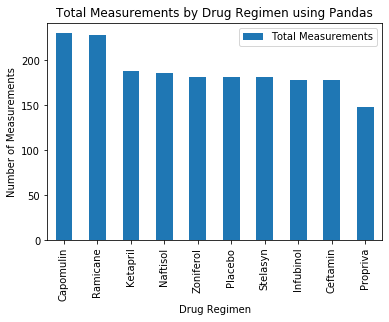

In [48]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_data = clean_combined_mouse_data["Drug Regimen"].value_counts()
drug_regimen_df = pd.DataFrame({"Total Measurements":drug_regimen_data})
df2plot = drug_regimen_df[["Total Measurements"]]
ax=df2plot.plot(kind="bar")
plt.title("Total Measurements by Drug Regimen using Pandas")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.show()

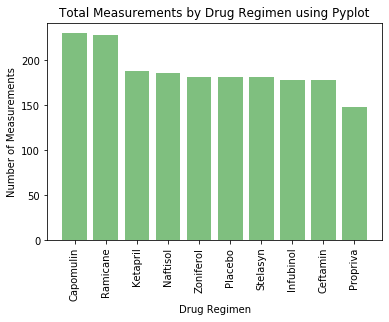

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = clean_combined_mouse_data["Drug Regimen"].nunique()
drug_regimen_height = clean_combined_mouse_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(drug_regimen_height))
plt.bar(x_axis,drug_regimen_height,color="g",alpha=0.5,align="edge")
drugs = ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Infubinol","Ceftamin","Propriva"]
plt.title("Total Measurements by Drug Regimen using Pyplot")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations,drugs,rotation="vertical")
plt.show()

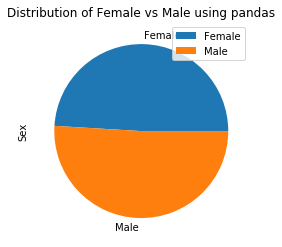

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_pandas = clean_combined_mouse_data.groupby("Sex")
male_female_count = male_female_pandas["Sex"].count()
male_female_pandas_df = pd.DataFrame({"Sex":male_female_count})
df2plot = male_female_pandas_df[["Sex"]]
ax=df2plot.plot(kind="pie",subplots=True)
plt.title("Distribution of Female vs Male using pandas")
plt.show()

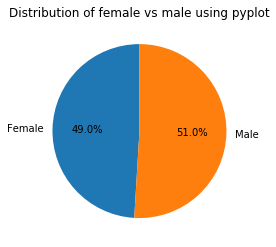

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female_pyplot = clean_combined_mouse_data.groupby("Sex")
male_female = male_female_pyplot["Sex"].count()
male_female_pyplot_df = pd.DataFrame({"Sex":male_female_count})
sex = ["Female","Male"]
plt.pie(male_female_pyplot_df["Sex"], labels=sex, autopct="%1.1f%%",startangle=90)
plt.title("Distribution of female vs male using pyplot")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
